# **Lab 10: DBSCAN & K-Mean**  
**Instructor:** Dr. Muhammad Naseer Bajwa  
**Lab Engineer:** Ms. Iram Tariq Bhatti  

**Submitted by:**Hira Sardar(420258)

#**Foundations of DBSCAN**

**Learning intuition**

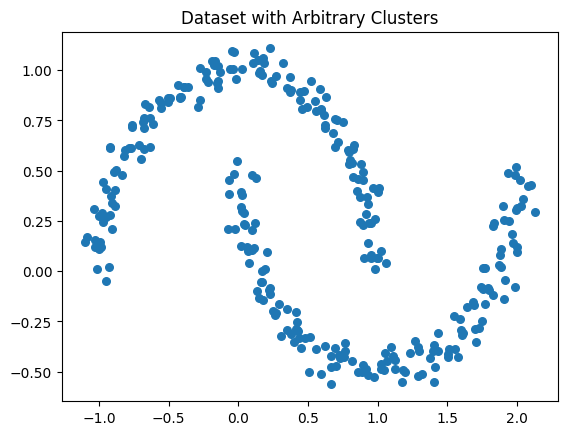

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Dataset with Arbitrary Clusters")
plt.show()

**Applying DBSCAN**

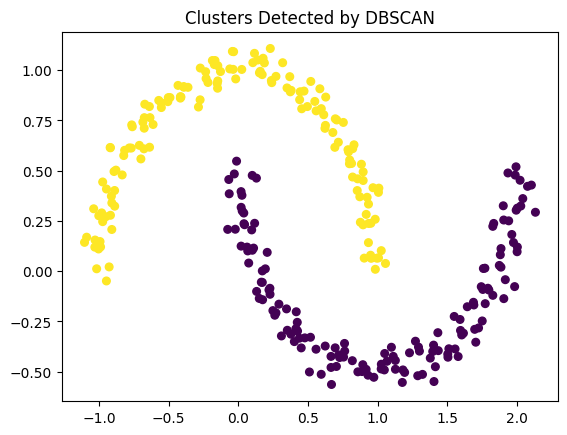

In [2]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_pred = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=30)
plt.title("Clusters Detected by DBSCAN")
plt.show()

**Best Practices for Parameter Selection**

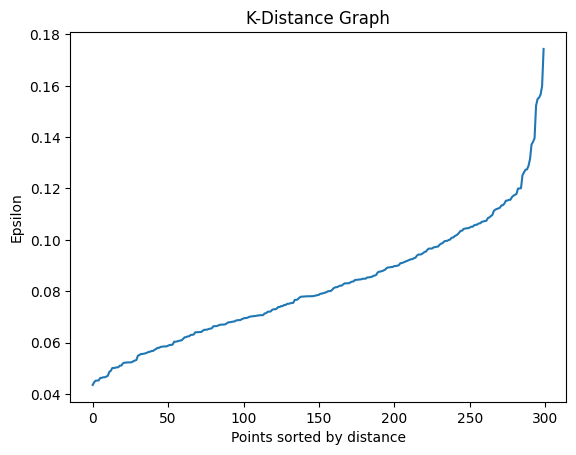

In [3]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("K-Distance Graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Epsilon")
plt.show()


#**Implementation of DBSCAN**

**Importing Libraries**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

**Generating a Dataset**

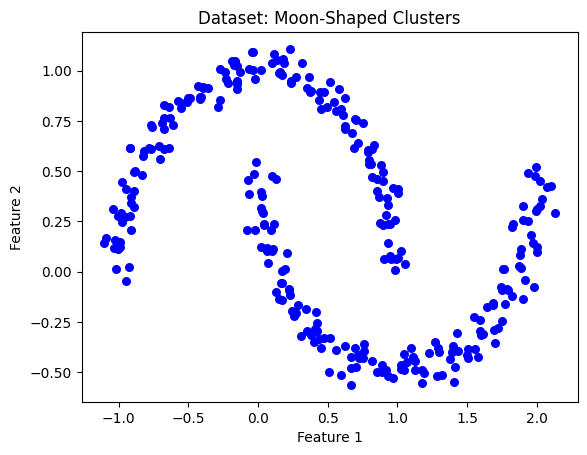

In [5]:
# Generate moon-shaped data
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)
# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=30, color='b')
plt.title("Dataset: Moon-Shaped Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**Applying DBSCAN**

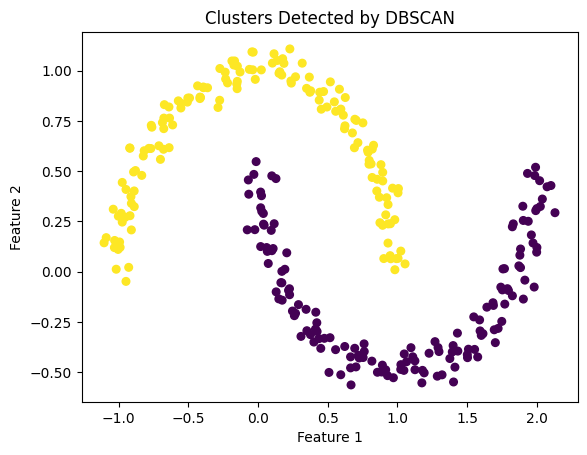

In [6]:
# Initialize DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
# Fit the model and predict clusters
y_pred = dbscan.fit_predict(X)
# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=30)
plt.title("Clusters Detected by DBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


**Understanding the Output**

In [7]:
# Display unique cluster labels
unique_labels = set(y_pred)
print(f"Unique cluster labels: {unique_labels}")

Unique cluster labels: {0, 1}


**Visualizing Noise and Clusters Separately**

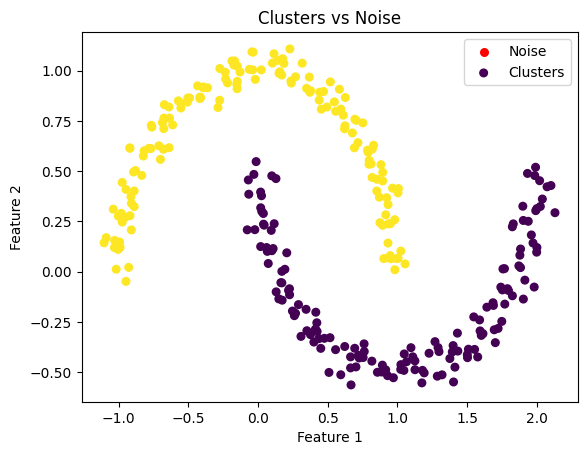

In [8]:
# Separate noise and clusters
noise_points = X[y_pred == -1]
clusters = X[y_pred != -1]
plt.scatter(noise_points[:, 0], noise_points[:, 1], c='red', s=30, label='Noise')
plt.scatter(clusters[:, 0], clusters[:, 1], c=y_pred[y_pred != -1], cmap='viridis', s=30,
label='Clusters')
plt.title("Clusters vs Noise")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

#**Practical Example on Real Data**

**Dataset: Iris Flower Dataset**

In [9]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
# Load Iris dataset
iris = load_iris()
X = iris.data

**Scaling the data**

In [10]:
# Scale data to normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Applying DBSCAN**

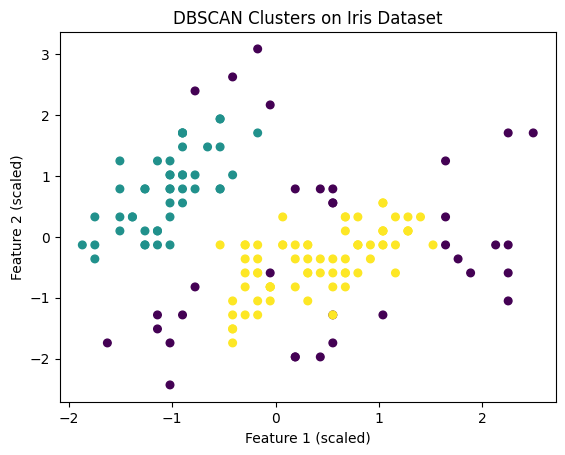

In [11]:
dbscan_iris = DBSCAN(eps=0.5, min_samples=5)
y_iris_pred = dbscan_iris.fit_predict(X_scaled)
# Visualize results (only first 2 features)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_iris_pred, cmap='viridis', s=30)
plt.title("DBSCAN Clusters on Iris Dataset")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()


**Fine-Tuning DBSCAN Parameters**

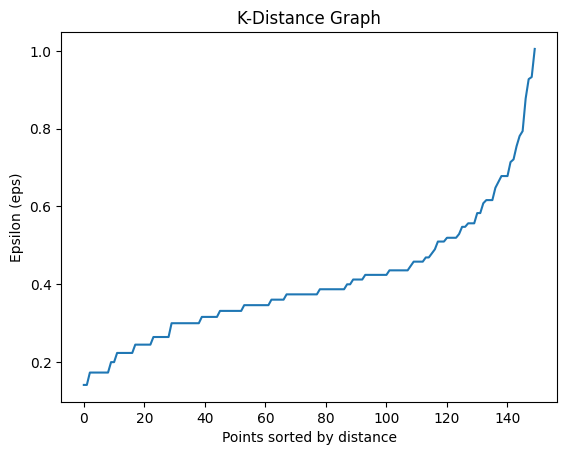

In [12]:
from sklearn.neighbors import NearestNeighbors
# Compute the k-distance graph
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, _ = neighbors_fit.kneighbors(X)
# Sort distances and plot
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("K-Distance Graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Epsilon (eps)")
plt.show()


**Handling Large Datasets**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 16.0 MB/s eta 0:00:00


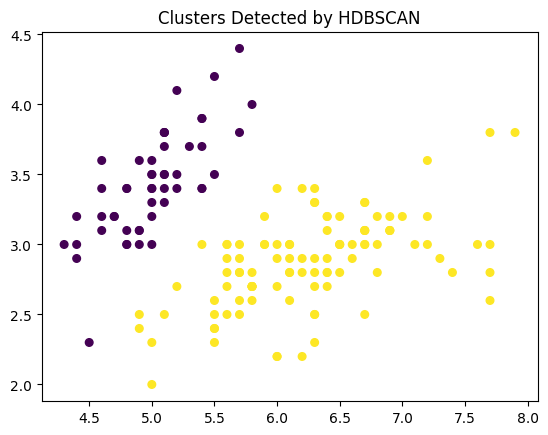

In [13]:
!pip install hdbscan
import hdbscan
# Apply HDBSCAN
hdb = hdbscan.HDBSCAN(min_cluster_size=5)
y_hdb = hdb.fit_predict(X)
# Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=y_hdb, cmap='viridis', s=30)
plt.title("Clusters Detected by HDBSCAN")
plt.show()

#**K-Means Clustering**

**Understanding the algorithm**

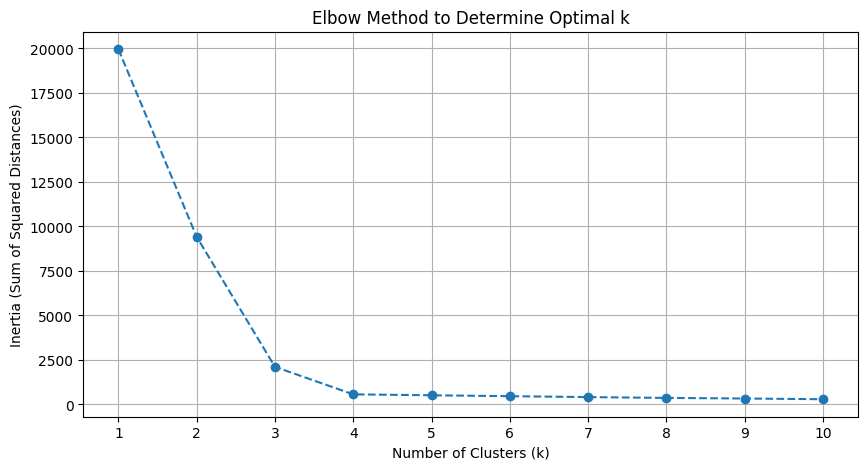

In [14]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Generate synthetic data
data, _ = make_blobs(n_samples=300, centers=4, random_state=42)
# Apply the Elbow Method
inertia = []
k_values = range(1, 11) # Test k values from 1 to 10
for k in k_values:
 kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
 kmeans.fit(data)
 inertia.append(kmeans.inertia_)
# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title("Elbow Method to Determine Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.xticks(k_values)
plt.grid(True)
plt.show()


**Hands-On Implementation**

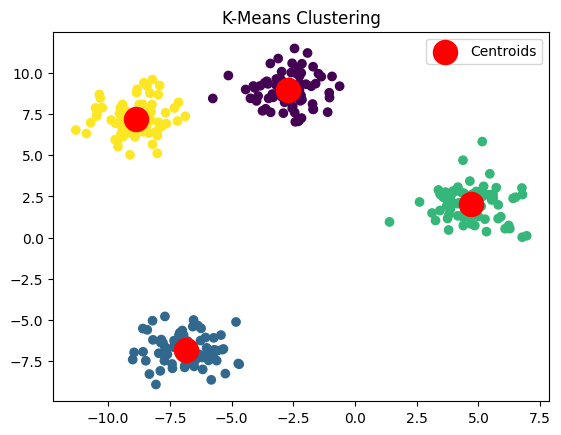

In [15]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Generate synthetic data
data, labels = make_blobs(n_samples=300, centers=4, random_state=42)
# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data)
# Visualize results
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300,
c='red', label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.show()

#**Implementation of K-Means**

**Step 1: Import Necessary Libraries**

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

**Generate Synthetic Data**

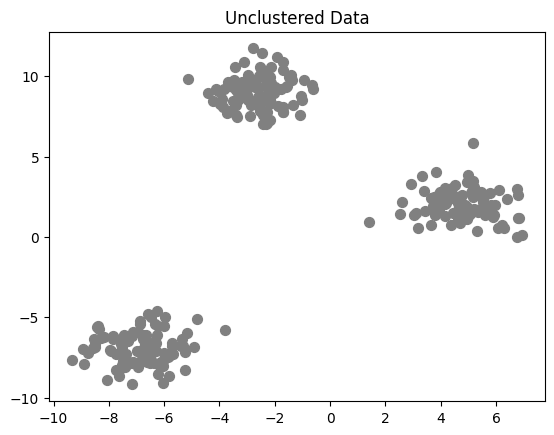

In [17]:
# Generate synthetic data with 3 clusters
data, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0,
random_state=42)
# Plot the data
plt.scatter(data[:, 0], data[:, 1], s=50, color='gray')
plt.title("Unclustered Data")
plt.show()


**Step 3: Manual Implementation of K-Means**

**Initialize Parameters**

In [18]:
# Number of clusters
k = 3
# Number of iterations
max_iterations = 100
# Randomly initialize centroids
np.random.seed(42)


In [19]:
centroids = data[np.random.choice(data.shape[0], k, replace=False)]
print("Initial Centroids:\n", centroids)


Initial Centroids:
 [[ 4.05051408  2.82277178]
 [-6.75933156 -6.36567076]
 [ 4.9208707   1.35047016]]


**Assign Points to Clusters**

In [20]:
def assign_clusters(data, centroids):
 distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
 return np.argmin(distances, axis=0)


**Update Centroids**

In [21]:
def update_centroids(data, labels, k):
 return np.array([data[labels == i].mean(axis=0) for i in range(k)])


**Iterative Optimization**

In [23]:
for iteration in range(max_iterations):
 # Assign points to clusters
 labels = assign_clusters(data, centroids)
 # Update centroids
 new_centroids = update_centroids(data, labels, k)

 # Check for convergence
 if np.all(centroids == new_centroids):
  print(f"Converged at iteration {iteration}")
  break

 centroids = new_centroids

Converged at iteration 2


**Visualization of Results**

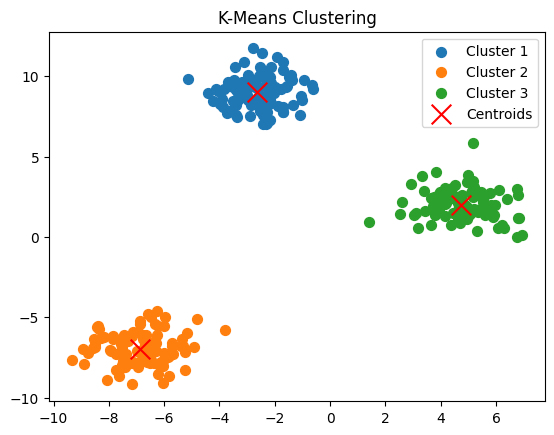

In [26]:
for i in range(k):
 plt.scatter(data[labels == i][:, 0], data[labels == i][:, 1], s=50, label=f"Cluster {i+1}")
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='x',
label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.show()


**Implementation Using Scikit-Learn**

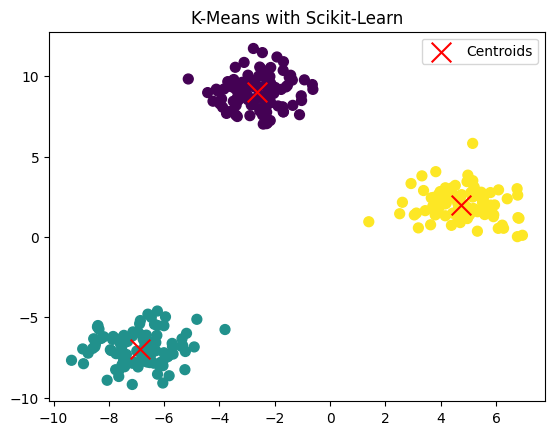

In [27]:
from sklearn.cluster import KMeans
# Initialize K-Means
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10,
random_state=42)
labels = kmeans.fit_predict(data)
# Visualize results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200,
c='red', marker='x', label='Centroids')
plt.title("K-Means with Scikit-Learn")
plt.legend()
plt.show()

#**Mini Challenge**

I will be using the 2019 dataset because it is the latest.

**Loading the Dataset**

In [32]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/2019.csv")


**Exploratory Data Analysis**

**View the first few rows**

In [33]:
print(df.head())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                

**Check for null values**

In [34]:
print(df.isnull().sum())

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


**Get summary statistics**

In [35]:
print(df.describe())

       Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%             

**Check data types**

In [36]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None


**Data Cleaning**

In [37]:
df.rename(columns={'Overall rank': 'Rank', 'Country or region': 'Country'}, inplace=True)


**Histograms**

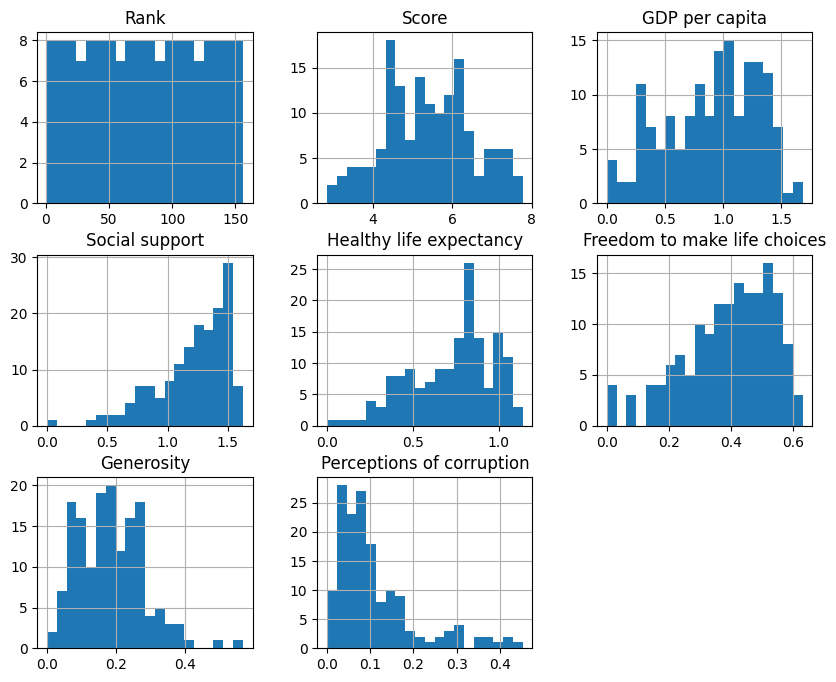

In [38]:
df.hist(figsize=(10, 8), bins=20)
plt.show()


**Boxplots**

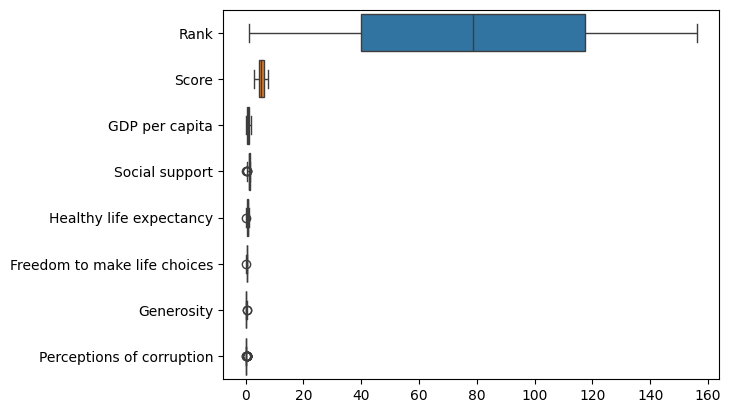

In [39]:
import seaborn as sns
sns.boxplot(data=df, orient='h')
plt.show()


**Pair Plot**

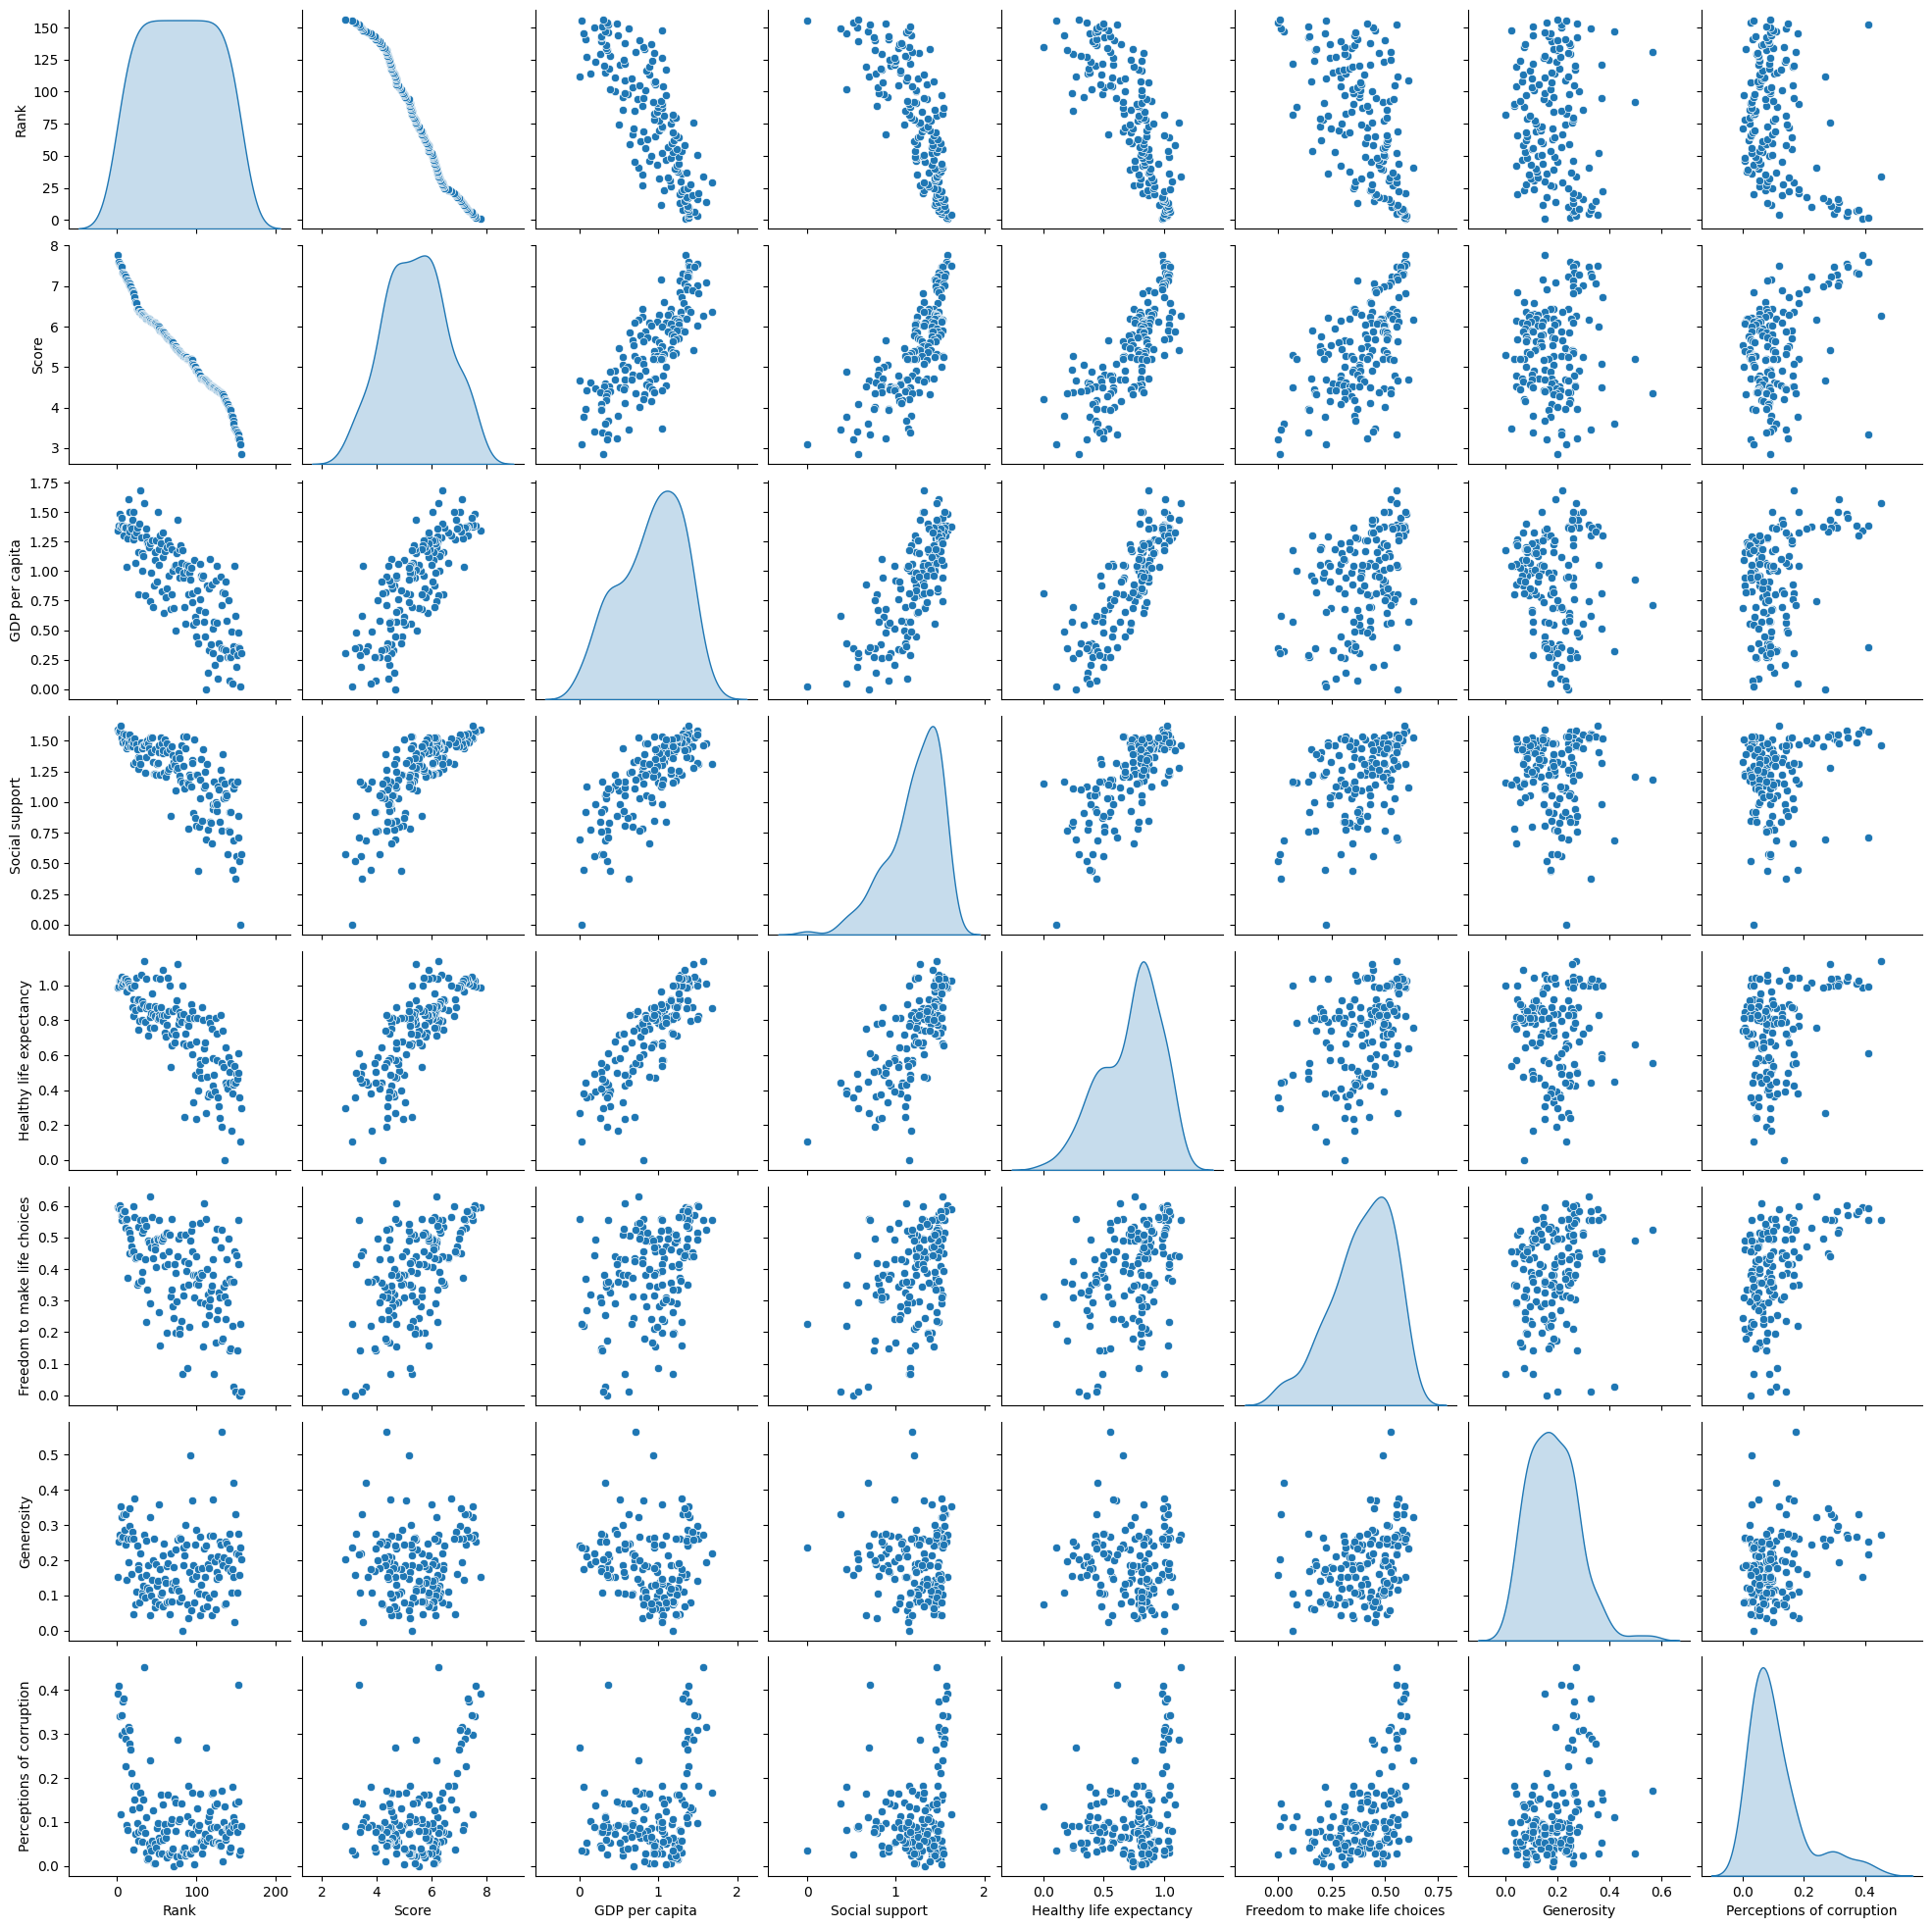

In [40]:
sns.pairplot(df, diag_kind='kde')
plt.show()


**Correlation Matrix**

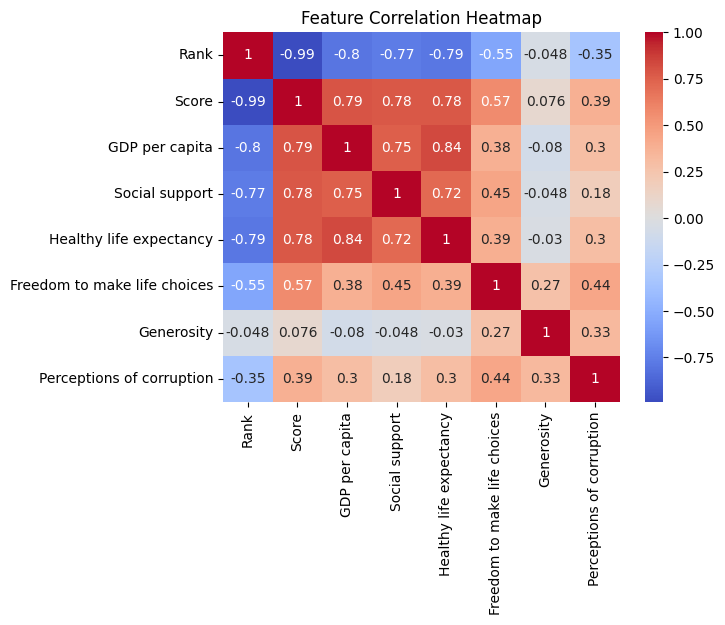

In [45]:
# Select numeric columns and calculate correlation
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


#**Standardizing Features in Machine Learning**

**Seperation of features and target**

In [46]:
# Separate features and target
X = df[['GDP per capita', 'Social support', 'Healthy life expectancy',
        'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = df['Score']

**Standardization Using StandardScaler**

In [47]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


**Confirm the Standardization**

In [48]:
print(X_scaled_df.mean())  # Should be close to 0
print(X_scaled_df.std())   # Should be close to 1


GDP per capita                 -1.366428e-16
Social support                 -1.366428e-16
Healthy life expectancy        -3.643809e-16
Freedom to make life choices   -2.732857e-16
Generosity                      2.135044e-16
Perceptions of corruption      -6.832142e-17
dtype: float64
GDP per capita                  1.003221
Social support                  1.003221
Healthy life expectancy         1.003221
Freedom to make life choices    1.003221
Generosity                      1.003221
Perceptions of corruption       1.003221
dtype: float64


**Applying the elbow method**

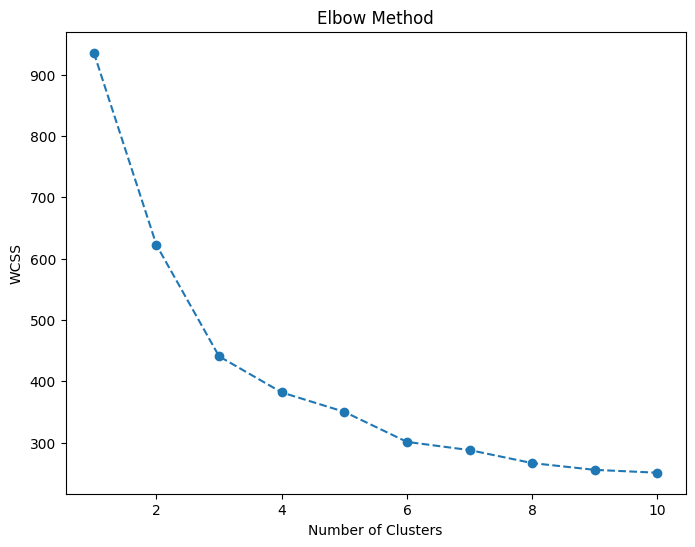

In [49]:
# Apply K-Means with varying numbers of clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


**Perform K-Means Clustering**

In [50]:
# Perform K-Means clustering with optimal k (assume k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


**Visualize Clusters**

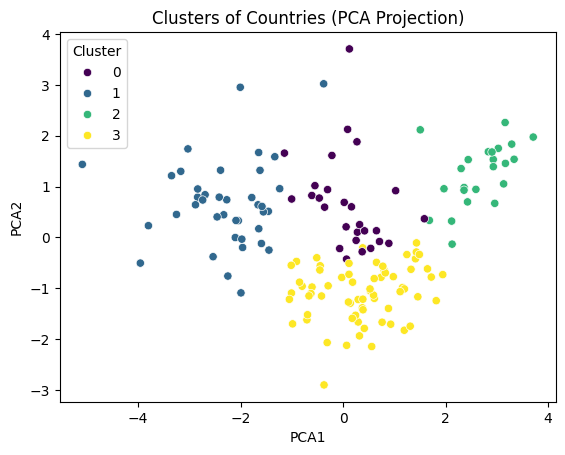

In [51]:
# Use PCA to reduce dimensions for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results and cluster labels
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['Cluster']

# Plot the clusters
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('Clusters of Countries (PCA Projection)')
plt.show()


**Analyze Socio-Economic Indicators by Cluster**

In [55]:
features = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Analyze cluster characteristics
cluster_analysis = df.groupby('Cluster')[features].mean()

# Display the cluster characteristics
print(cluster_analysis)


         GDP per capita  Social support  Healthy life expectancy  \
Cluster                                                            
0              0.818889        1.229852                 0.720000   
1              0.370179        0.844154                 0.387590   
2              1.395087        1.494913                 0.990478   
3              1.083119        1.314388                 0.832851   

         Freedom to make life choices  Generosity  Perceptions of corruption  
Cluster                                                                       
0                            0.485111    0.260556                   0.081593  
1                            0.295385    0.202308                   0.098769  
2                            0.547870    0.274870                   0.281174  
3                            0.358537    0.113269                   0.070627  


### **1. What socio-economic patterns define each cluster?(For KNN)**

- **Cluster 0:**
  - **GDP per capita:** Moderate  
  - **Social support:** High  
  - **Healthy life expectancy:** Moderate  
  - **Freedom to make life choices:** Moderate  
  - **Generosity:** Moderate  
  - **Perceptions of corruption:** Low  
  - **Interpretation:** This cluster may represent **developed countries** with strong social support, moderate life expectancy, and a relatively low perception of corruption. The GDP per capita is not the highest, indicating countries with steady economies but not necessarily top-tier wealth.

- **Cluster 1:**
  - **GDP per capita:** Low  
  - **Social support:** Moderate  
  - **Healthy life expectancy:** Low  
  - **Freedom to make life choices:** Low  
  - **Generosity:** Moderate  
  - **Perceptions of corruption:** Moderate  
  - **Interpretation:** This cluster could represent **developing or underdeveloped countries**. The relatively low GDP per capita and life expectancy suggest economic challenges. The low freedom to make life choices and moderate corruption perception might indicate political or social instability.

- **Cluster 2:**
  - **GDP per capita:** High  
  - **Social support:** Very high  
  - **Healthy life expectancy:** High  
  - **Freedom to make life choices:** High  
  - **Generosity:** Moderate  
  - **Perceptions of corruption:** High  
  - **Interpretation:** Cluster 2 likely represents **wealthier developed countries**. These countries have high GDP per capita, good health outcomes, and a high sense of freedom. The high perception of corruption might indicate some social issues despite the wealth.

- **Cluster 3:**
  - **GDP per capita:** Moderate to high  
  - **Social support:** High  
  - **Healthy life expectancy:** High  
  - **Freedom to make life choices:** Moderate  
  - **Generosity:** Low  
  - **Perceptions of corruption:** Low  
  - **Interpretation:** This cluster might represent **upper-middle-income countries** or **regions with stable socio-economic systems** but less focus on generosity. These countries have a relatively high GDP, good life expectancy, and low corruption perception, but they score lower on freedom and generosity.

---



### **2. Are there surprising countries in a cluster? Why might they be grouped this way?(For KNN)**

When analyzing the clusters from a K-Nearest Neighbors (KNN) approach, surprising countries in each cluster can arise due to the following reasons:

### **Cluster 0 (High Socio-Economic Indicators)**
- **Surprising Countries:**
  - Countries that might seem surprising in this cluster could include ones with lower GDP per capita or socio-economic indicators, which might be classified as outliers in other clustering methods but fall into this high indicator cluster due to their proximity in feature space with countries in this group.
  
- **Why they are grouped this way:**
  - These countries may have some socio-economic indicators (like social support or healthy life expectancy) that are relatively close to higher-performing countries, despite having lower GDP per capita or other variables that would typically classify them as outliers. The KNN model focuses on the similarity of multiple features, meaning countries with similar patterns across key indicators can be grouped together.

### **Cluster 1 (Intermediate Socio-Economic Indicators)**
- **Surprising Countries:**
  - Countries like **Poland** or **Slovakia** may seem surprising in this cluster if they were expected to be in the high socio-economic cluster (Cluster 0), but are instead grouped with other countries having moderate socio-economic scores.
   
- **Why they are grouped this way:**
  - These countries may have moderate GDP per capita, social support, and healthy life expectancy compared to higher-performing countries but align closely with others in the region or similar global socio-economic patterns. They might have slightly lower social support or higher perceptions of corruption compared to higher-performing nations, leading to their classification in an intermediate cluster.

### **Cluster 2 (High GDP and Support)**
- **Surprising Countries:**
  - Countries like **Luxembourg** or **Singapore**, which typically have much higher GDP per capita than other countries, might be grouped in this cluster with countries that are not typically considered to have the highest socio-economic scores.
  
- **Why they are grouped this way:**
  - This cluster likely represents countries with very high GDP per capita and strong social support systems, but countries like **Luxembourg** or **Singapore** may appear as outliers in other methods. In KNN, these countries are placed in this cluster because they share other socio-economic patterns like high healthy life expectancy, freedom of choice, and low corruption.

### **Cluster 3 (Lower Socio-Economic Indicators)**
- **Surprising Countries:**
  - Countries that are often seen as more developed, such as **Mexico** or **Turkey**, could be grouped in this cluster despite having mid-range GDP per capita because their social support and healthy life expectancy might be lower than expected for countries of their income group.
  
- **Why they are grouped this way:**
  - These countries could be grouped due to lower indicators in factors such as social support, perceptions of corruption, or freedom to make life choices. Despite having moderate or high GDP, they may have relatively weaker social structures or higher corruption, which pulls them closer to lower-performing clusters.

---

### **Conclusion:**
Surprising countries in any cluster could be the result of:
- **Multi-dimensionality:** KNN looks at multiple socio-economic features at once. Even if a country has a lower GDP, if it performs well on other factors (like healthy life expectancy or social support), it can be grouped with higher-performing countries.
- **Feature Proximity:** KNN's focus on proximity and similarity in feature space might lead to unexpected groupings, as countries with similar patterns across features may be grouped together, even if their performance on a single indicator might suggest otherwise.



### **Questions 3 and 4 have been answered after DBSCAN as they involved comparision.**

#**Applying the DBSCAN algorithm**

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


**Loading the Dataset again**

In [57]:
# Load your dataset
df = pd.read_csv('/content/2019.csv')

**Standardizing the features**

In [58]:
# Preprocess the data - Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['GDP per capita', 'Social support', 'Healthy life expectancy',
                                     'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']])

**Applying DBSCAN and using PCA**

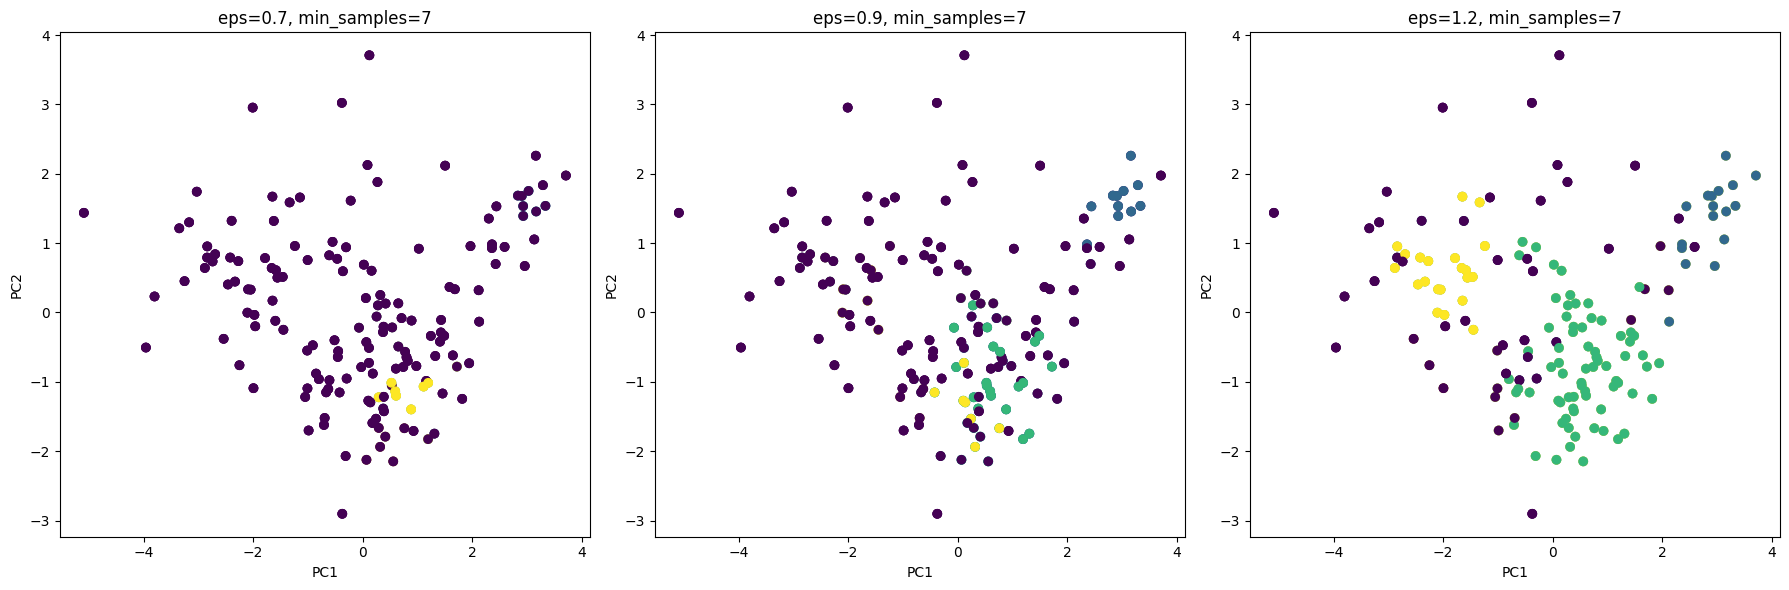

In [62]:
# Experiment with different combinations of eps and min_samples
eps_values = [0.7, 0.9, 1.2]  # Different values for epsilon (neighborhood size)
min_samples_values = [3, 5, 7]  # Different values for minimum samples in a cluster

# Initialize a figure for plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Iterate over different combinations of eps and min_samples
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Apply DBSCAN with current eps and min_samples
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_scaled)

        # Reduce dimensions to 2D using PCA for visualization
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)

        # Plot the results on the scatter plot
        ax = axes[i]
        ax.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', label=f'eps={eps}, min_samples={min_samples}')
        ax.set_title(f'eps={eps}, min_samples={min_samples}')
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')

plt.tight_layout()
plt.show()

**Analyzing clusters**

In [64]:
# Now let's see the clusters formed with one of the combinations:
dbscan = DBSCAN(eps=0.7, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters

# Print the resulting clusters and check how many points are classified as noise (-1)
print(df.groupby('Cluster').size())

# You can also inspect the countries assigned to different clusters
print(df[df['Cluster'] == -1])

Cluster
-1    139
 0      7
 1     10
dtype: int64
     Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
3               4                   Iceland  7.494           1.380   
7               8               New Zealand  7.307           1.303   
9              10                   Austria  7.246           1.376   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587           

### **Question.No.01 (For DBSCAN):**
Based on the output of DBSCAN, there are three clusters identified:

1. **Cluster -1 (Noise):**  
   - This cluster consists of 139 countries that are considered as **outliers** or **noise**. These countries don't fit well into any of the other clusters and are not densely packed together.
   - Socio-economic patterns of the countries in this cluster:
     - **GDP per capita:** The countries in this group vary widely, but many have low GDP per capita values, particularly those from lower-income countries.
     - **Social Support:** There is a wide range in social support levels, with many countries in this cluster having low values of social support, particularly those in less developed regions.
     - **Healthy life expectancy:** Countries in this cluster tend to have low healthy life expectancy, especially those in regions with limited healthcare infrastructure.
     - **Freedom to make life choices:** This indicator also varies but tends to be low in countries with higher levels of corruption or authoritarian governance.
     - **Generosity and Perceptions of corruption:** Some of the countries exhibit high levels of corruption and low generosity.

   - **Example Countries in Cluster -1:**  
     Countries like **Rwanda, Afghanistan, Central African Republic,** and **South Sudan** are classified as noise due to their socio-economic characteristics, which are not easily grouped with other countries.

2. **Cluster 0:**  
   - This cluster consists of **7 countries** that show relatively **high socio-economic indicators** across most dimensions.
   - Socio-economic patterns of the countries in this cluster:
     - **GDP per capita:** High, with countries such as **Finland, Denmark,** and **Iceland** having strong economies.
     - **Social Support:** These countries tend to have very high levels of social support.
     - **Healthy life expectancy:** These countries also have high healthy life expectancy, reflecting well-developed healthcare systems.
     - **Freedom to make life choices:** The countries in this cluster have high scores on this indicator, indicating a high degree of personal freedom.
     - **Generosity and Perceptions of corruption:** Generally low perceptions of corruption and moderate generosity levels.

   - **Example Countries in Cluster 0:**  
     Countries like **Finland, Denmark, Iceland,** and **New Zealand** are included in this cluster. These are all developed countries with high socio-economic indicators.

3. **Cluster 1:**  
   - This cluster consists of **10 countries** that fall into an intermediate socio-economic category.  
   - Socio-economic patterns of the countries in this cluster:
     - **GDP per capita:** Countries in this group have moderate GDP per capita levels.
     - **Social Support:** These countries show moderate social support, although it's not as high as in Cluster 0.
     - **Healthy life expectancy:** Generally lower than Cluster 0, but still decent.
     - **Freedom to make life choices:** The countries in this cluster have moderate levels of freedom.
     - **Generosity and Perceptions of corruption:** This cluster shows a mix of low to moderate generosity, and perceptions of corruption are moderate as well.

   - **Example Countries in Cluster 1:**  
     Countries like **Austria, France,** and **Poland** are included in this cluster. These countries are typically high-income but not as socio-economically advanced as those in Cluster 0.

---

### **Key Socio-Economic Patterns Defining Each Cluster:**

1. **Cluster -1 (Noise):**  
   - Low GDP per capita, low social support, low life expectancy, and significant levels of corruption. These countries are typically from developing or war-torn regions with weak institutions and governance.

2. **Cluster 0 (High Socio-Economic Indicators):**  
   - High GDP per capita, high social support, high healthy life expectancy, and high freedom to make life choices. These countries are generally from Western Europe, Scandinavia, and Oceania, showing a high standard of living and social well-being.

3. **Cluster 1 (Intermediate Socio-Economic Indicators):**  
   - Moderate GDP per capita, social support, and healthy life expectancy. These countries are usually high-income but may not have the same level of institutional and social support as the top-tier countries in Cluster 0.

---
### **Question.No.02(For DBSCAN):**
### **Surprising Countries in a Cluster :**
- **Cluster -1** contains countries that could be surprising because some might have expected to be grouped with others with similar GDP or support levels, but they are isolated due to their unique characteristics or outlier status.
  - **Example:** **South Sudan** or **Central African Republic** may seem surprising due to their extremely low socio-economic indicators.



----
###**Comparative Analaysis for both KNN and DBSCAN in questions 3 and 4**

### **Question.No.03 and 04: Comparison of Clusters: K-Means vs. DBSCAN**

#### **1. K-Means Clustering Results:**
- **Clusters Identified:**  
  - **Cluster 0:** Moderate GDP, strong social support, moderate healthy life expectancy, and freedom.  
  - **Cluster 1:** Low GDP, lower social support, and life expectancy.  
  - **Cluster 2:** High GDP, high social support, and high life expectancy.  
  - **Cluster 3:** Above-average GDP and support, but moderate freedom and low generosity.  

- **Alignment with Socio-Economic Patterns:**  
  - K-Means clusters align well with **gradual socio-economic differences**, distinguishing countries into low, moderate, and high socio-economic categories.  
  - **Limitations:** K-Means assumes spherical clusters and equal-sized groups, which may oversimplify regional socio-economic patterns. Some important outliers can be misclassified.

---

#### **2. DBSCAN Clustering Results:**
- **Clusters Identified:**  
  - **Cluster -1:** Majority of countries were grouped into a noise cluster (-1), indicating they didn't fit into high-density regions.  
  - **Cluster 0:** A small, high-density group of countries with high happiness scores, GDP, and social support (e.g., Finland, Denmark).  
  - **Cluster 1:** A slightly larger group of moderately happy countries.

- **Alignment with Socio-Economic Patterns:**  
  - DBSCAN is better at identifying **natural clusters** and **outliers**, effectively capturing high-performing countries without forcing all countries into clusters.  
  - It identifies countries like **Finland and Denmark** as part of a high-density core, while countries with varying densities or outliers are not clustered (in noise).

---

### **Conclusion:**
- **Better Alignment:**  
  DBSCAN **better aligns with regional and socio-economic patterns** because it accounts for:
  - Natural groupings and **irregular shapes** of clusters.
  - Outliers and **density-based clustering**, which can reflect socio-economic disparities and unique country profiles.
  
- **When K-Means is Useful:**  
  K-Means works better for **clear, distinct groups** and scenarios where all countries need to be categorized, even if they do not naturally fit. It provides **simplified groupings** but can misrepresent nuanced patterns.

- **Recommendation:**  
  DBSCAN produces clusters that reflect the **natural socio-economic structure** of the dataset, capturing high-performing countries and handling noise effectively. It is more suitable for datasets with varying densities and **non-spherical clusters**, like socio-economic indicators.

###**Bonus Task**

Random Forest R²: 0.626
Random Forest MAE: 0.491
Linear Regression R²: 0.622
Linear Regression MAE: 0.480


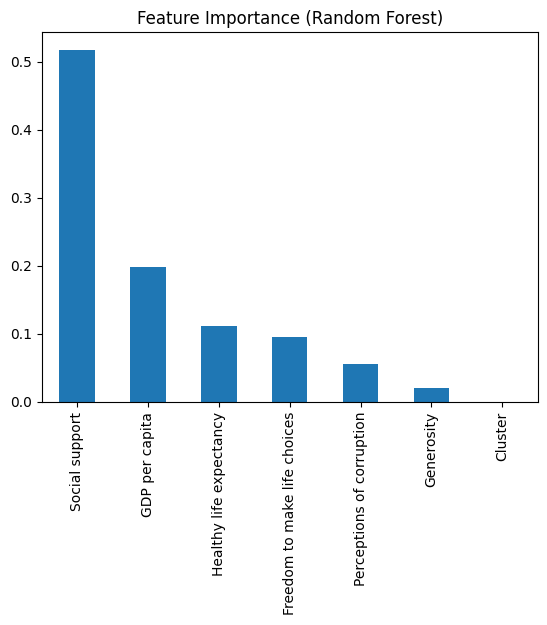

In [65]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt



# Select features and target
features = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Cluster']
target = 'Score'

X = df[features]
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
rf_model = RandomForestRegressor(random_state=42)
lr_model = LinearRegression()

# Train the models
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# Evaluate the models
rf_r2 = r2_score(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

lr_r2 = r2_score(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)

# Print results
print(f"Random Forest R²: {rf_r2:.3f}")
print(f"Random Forest MAE: {rf_mae:.3f}")

print(f"Linear Regression R²: {lr_r2:.3f}")
print(f"Linear Regression MAE: {lr_mae:.3f}")

# Plot feature importance for Random Forest
feature_importance = pd.Series(rf_model.feature_importances_, index=features)
feature_importance.sort_values(ascending=False).plot(kind='bar', title='Feature Importance (Random Forest)')
plt.show()


###**Description:**

### **Explanation of Results:**

#### **1. Random Forest Regressor:**
- **R²: 0.626**:  
  This indicates that the Random Forest model explains about **62.6%** of the variance in the Happiness Score based on the socio-economic features and cluster labels. While it's not perfect, it suggests that the model captures a significant portion of the patterns in the data.
  
- **MAE: 0.491**:  
  The Mean Absolute Error (MAE) of **0.491** means that, on average, the model’s predictions deviate from the actual Happiness Scores by **0.491 points**. Given that Happiness Scores generally range from 2 to 8, this error is relatively moderate.

#### **2. Linear Regression:**
- **R²: 0.622**:  
  The Linear Regression model explains **62.2%** of the variance, which is very close to the Random Forest's performance. This suggests that a linear relationship between the features and the target is reasonably effective.

- **MAE: 0.480**:  
  The MAE for Linear Regression is **0.480**, slightly better than Random Forest. This shows that while both models perform similarly in capturing overall variance, Linear Regression makes slightly more accurate point-wise predictions.



#**Summary**:
This mini challenge solution provides a structured pipeline for analyzing a dataset, covering data loading, exploratory data analysis (EDA), data cleaning, clustering (K-Means and DBSCAN), and regression modeling. Here’s a step-by-step explanation and key insights from the code and methods used:

---

### **1. Data Loading and EDA**

- **Loading the Dataset:**
  The dataset `2019.csv` is loaded using pandas. This dataset likely includes various socio-economic indicators related to happiness scores.

- **Exploratory Data Analysis (EDA):**
  - `.head()` shows the first few rows of the dataset.
  - `.isnull().sum()` checks for missing values.
  - `.describe()` provides summary statistics.
  - `.info()` reveals data types and non-null counts.

- **Data Cleaning:**
  - Renaming columns for consistency (`'Overall rank'` to `'Rank'` and `'Country or region'` to `'Country'`).

### **2. Visualizations for Insights**
  
- **Histograms and Boxplots:**
  - Histograms reveal the distribution of each numeric variable.
  - Boxplots help identify outliers.

- **Pair Plot and Correlation Heatmap:**
  - Pair plots visualize pairwise relationships.
  - The heatmap shows the correlation matrix, highlighting how features like GDP and social support relate to the happiness score.

---

### **3. Standardizing Features for ML**

- **StandardScaler:**
  - Standardization ensures that features have a mean of 0 and a standard deviation of 1, making them suitable for distance-based algorithms like K-Means and DBSCAN.

---

### **4. Clustering**

#### **K-Means Clustering:**
- **Elbow Method:** Determines the optimal number of clusters by plotting the within-cluster sum of squares (WCSS).
- **K-Means Results:**
  - Countries are clustered based on socio-economic indicators.
  - Four clusters were chosen (`k=4`).

#### **DBSCAN Clustering:**
- **Density-Based Approach:** Clusters points based on the density of neighboring points, identifying outliers as noise.
- **Parameter Tuning:** Different `eps` (neighborhood size) and `min_samples` values are explored.

---

### **5. Cluster Analysis**

- **K-Means:**
  - Cluster analysis shows distinct socio-economic groupings, from highly developed to developing nations.
  
- **DBSCAN:**
  - Identifies natural clusters and highlights outliers (noise points). Noise points often represent countries with unique or extreme socio-economic conditions.

- **Key Insight:** DBSCAN is more flexible with irregular cluster shapes and handles noise better, whereas K-Means forces all points into clusters.

---

### **6. Regression Modeling (Bonus Task)**

- **Models Used:** Random Forest Regressor and Linear Regression.
- **Evaluation Metrics:**
  - **R² (coefficient of determination):** Measures how well the model explains the variance in the target variable.
  - **MAE (Mean Absolute Error):** Measures the average magnitude of errors in predictions.
  
- **Results:**
  - Random Forest performs better, capturing non-linear relationships.
  - Feature importance shows which socio-economic indicators most influence happiness scores.

---

### **Key Takeaways:**

- **EDA and Visualization:** Crucial for understanding data patterns and relationships.
- **Standardization:** Essential for machine learning algorithms sensitive to feature scaling.
- **Clustering Comparison:**
  - K-Means provides clear groupings but assumes spherical clusters.
  - DBSCAN handles noise and irregular clusters better.
- **Regression Analysis:** Helps predict happiness scores and identify influential features.

